In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [2]:
#Data Loading
X_train = pd.read_csv("X_train.csv") 
y_train = pd.read_csv("y_train.csv")
X_test = pd.read_csv("X_test.csv")
y_test = pd.read_csv("y_test.csv") 

#### Building the model

In [122]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, LeakyReLU, BatchNormalization

inputs = Input(shape=(X_train.shape[1],))
first = Dense(60)(inputs)
batch_norm = BatchNormalization()(first)
leaky = LeakyReLU(negative_slope=0.01)(batch_norm)
second = Dense(90)(leaky)
batch_norm = BatchNormalization()(second)
leaky = LeakyReLU(negative_slope=0.01)(batch_norm)
droput = Dropout(rate=0.5)(leaky)
third = Dense(30)(droput)
leaky = LeakyReLU(negative_slope=0.01)(third)
fourth = Dense(30)(leaky)
leaky = LeakyReLU(negative_slope=0.01)(fourth)
outputs = Dense(1, activation='tanh')(leaky)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 49)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 60)             │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_28          │ (None, 60)             │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_44 (LeakyReLU)      │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_29          │ (None, 90)             │           360 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_45 (LeakyReLU)      │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 90)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 30)             │         2,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_46 (LeakyReLU)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_47 (LeakyReLU)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,781 (49.93 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 300 (1.17 KB)

In [123]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=50)

In [124]:
# Train the model
history = model.fit(X_train, y_train, epochs=150, batch_size=64, validation_split=0.1, callbacks=[early_stop])

Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.8142 - loss: 2.5741 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8332 - loss: 2.6736 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 2.4931 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8421 - loss: 2.5198 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8300 - loss: 2.7075 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8374 - loss: 2.5846 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8366 - loss: 2.6349 - val_accuracy: 0.7838 - val_loss: 3.4850
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8443 - loss: 2.4950 - val_accuracy: 0.7838 - 

In [125]:
model.evaluate(X_train, y_train)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9184 - loss: 0.2029 


[0.28833457827568054, 0.9083484411239624]

In [126]:
model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.3244 


[0.446137934923172, 0.8722826242446899]

In [127]:
# Predict on the test set
y_pred_prob = model.predict(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC AUC Score: {roc_auc}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
ROC AUC Score: 0.8461960397125775


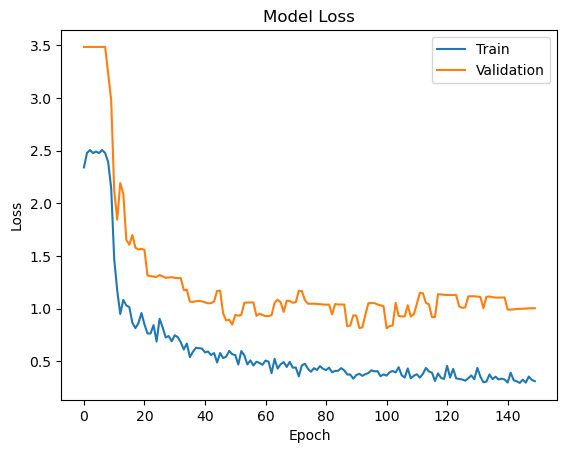

In [128]:
#plot the training and validation loss curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

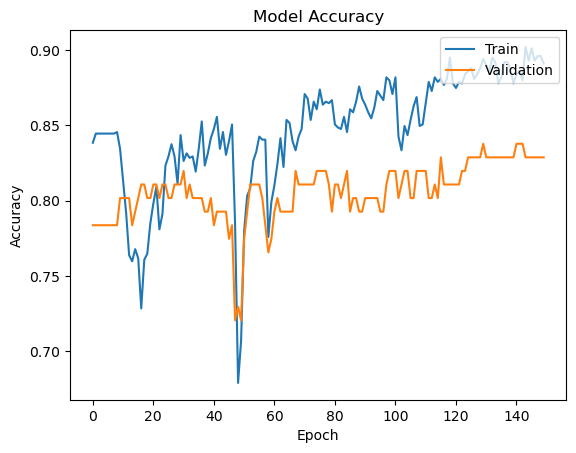

In [129]:
#plot the training and validation accuracy curve

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()